# Polynominální regrese

## Úkol

- Načtěte dataset s velikostmi a cenami
- Prozkoumejte a zobrazte data
- Vytvořte lineární model a zjistětě jaho R2
- Vytvořte polynomiální modely s různým stupni, zjistěte jejich R2
- Vyberte nejlepší model 

# Načtení dat

In [36]:
import pandas as pd 

In [37]:
data = pd.read_csv ("..\dataset\prices.csv",  sep=';')

# Lineární model
- standardizujte data
- vytvořte a natrénujte lineární model
- zobrazte parametry modelu
- vizualizujte lineární model
- zobrazte skóre modelu

# Vytvořte polynominální regresní model
- vytvořte model polynominální 1D model se stupni 2 - 8
- modely zobrazte
- zobrazte jejich parametry
- zobrazte jejich skóre
- Který model byste vybrali?

        Size       Price
0   51.00000   901.18810
1   70.36735   972.23867
2   89.73469  1001.99394
3  109.10204  1024.90830
4  128.46939  1053.72491
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Size    62 non-null     float64
 1   Price   62 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB
None
              Size        Price
count    62.000000    62.000000
mean    641.704081  1327.839685
std     349.418285   148.292994
min      51.000000   901.188100
25%     346.352037  1241.288570
50%     641.704085  1358.216850
75%     937.056123  1447.718920
max    1232.408156  1527.818240


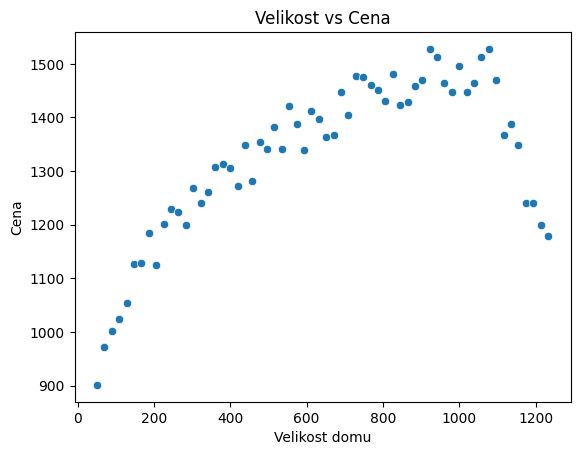

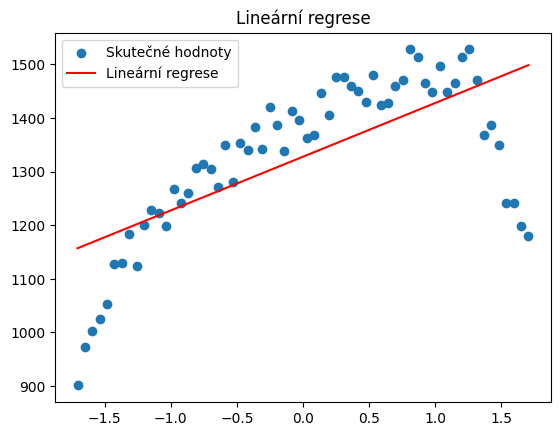

Lineární model - R2: 0.4641
Koeficienty: [100.2024297], Intercept: 1327.8396854838713
Polynomiální regrese (stupeň 2) - R2: 0.8808
Polynomiální regrese (stupeň 3) - R2: 0.8962
Polynomiální regrese (stupeň 4) - R2: 0.9536
Polynomiální regrese (stupeň 5) - R2: 0.9549
Polynomiální regrese (stupeň 6) - R2: 0.9560
Polynomiální regrese (stupeň 7) - R2: 0.9569
Polynomiální regrese (stupeň 8) - R2: 0.9589


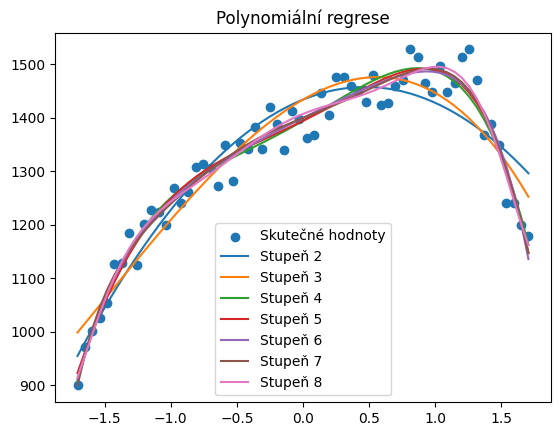

Nejlepší model: stupeň 8 s R2 = 0.9589


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

# Načtení dat
data = pd.read_csv("../dataset/prices.csv", sep=';')

# Zobrazení základních informací
print(data.head())
print(data.info())
print(data.describe())

# Vizualizace dat
sns.scatterplot(x=data["Size"], y=data["Price"])
plt.xlabel("Velikost domu")
plt.ylabel("Cena")
plt.title("Velikost vs Cena")
plt.show()

# Standardizace dat
scaler = StandardScaler()
X = scaler.fit_transform(data[["Size"]])
y = data["Price"].values

# Lineární model
lin_model = LinearRegression()
lin_model.fit(X, y)
y_pred_lin = lin_model.predict(X)


plt.scatter(X, y, label="Skutečné hodnoty")
plt.plot(X, y_pred_lin, color='red', label="Lineární regrese")
plt.legend()
plt.title("Lineární regrese")
plt.show()

print(f"Lineární model - R2: {r2_score(y, y_pred_lin):.4f}")
print(f"Koeficienty: {lin_model.coef_}, Intercept: {lin_model.intercept_}")

# Polynomiální regrese (stupně 2-8)
plt.scatter(X, y, label="Skutečné hodnoty")

degrees = range(2, 9)
best_r2 = -np.inf
best_degree = 2
best_model = None

for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    
    print(f"Polynomiální regrese (stupeň {degree}) - R2: {r2:.4f}")
    
    plt.plot(X, y_pred, label=f"Stupeň {degree}")
    
    if r2 > best_r2:
        best_r2 = r2
        best_degree = degree
        best_model = model

plt.legend()
plt.title("Polynomiální regrese")
plt.show()

print(f"Nejlepší model: stupeň {best_degree} s R2 = {best_r2:.4f}")
